In [1]:
%pylab notebook
import numpy as np
import scipy as sp
from scipy.linalg import circulant

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


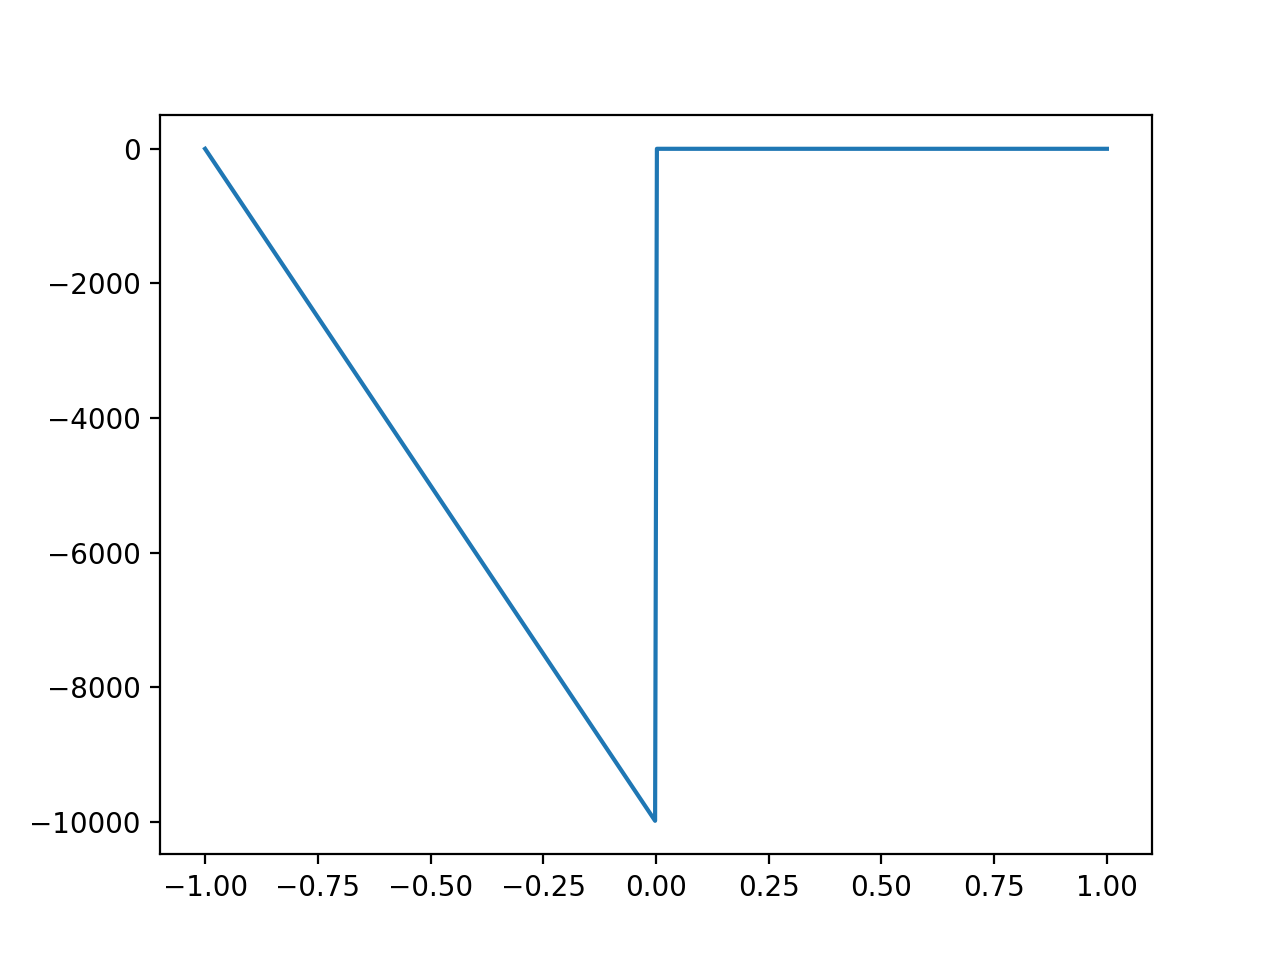

In [194]:
N=500 ;p=0.1; V0=1.e4
x=np.linspace(-1,1,N)
h=np.mean(x[1:]-x[:-1])
v=np.zeros(np.size(x),float)

# Step potential
v[x<x[int(ceil(p*N))]]=1.; v[x>=x[N-int(ceil(p*N))]]=1.
# Harmonic well
#v=x**2. ; 
# V well
#sl=30
v[x<0.]=-sl*(x[x<0.]) ; v[x>=0.]=max(v)# sl*(x[x>=0.5]-0.5)

#
v=V0*v/max(v)-V0

figure()
plot(x,v)

In [180]:
sO=np.zeros(np.size(x),float)
sO[0]=-2 ; sO[1]=1 ;  sO[N-1]=1
O=circulant(sO)/h/h
Ov=diag(v)

In [181]:
for i,tx1 in enumerate(x):
    for j,tx2 in enumerate(x):
        if tx1==tx2:
            O[i,j]=-2./h/h
        if abs(abs(tx1-tx2)/h-1.)<1.e-10:
            O[i,j]=1./h/h

<IPython.core.display.Javascript object>


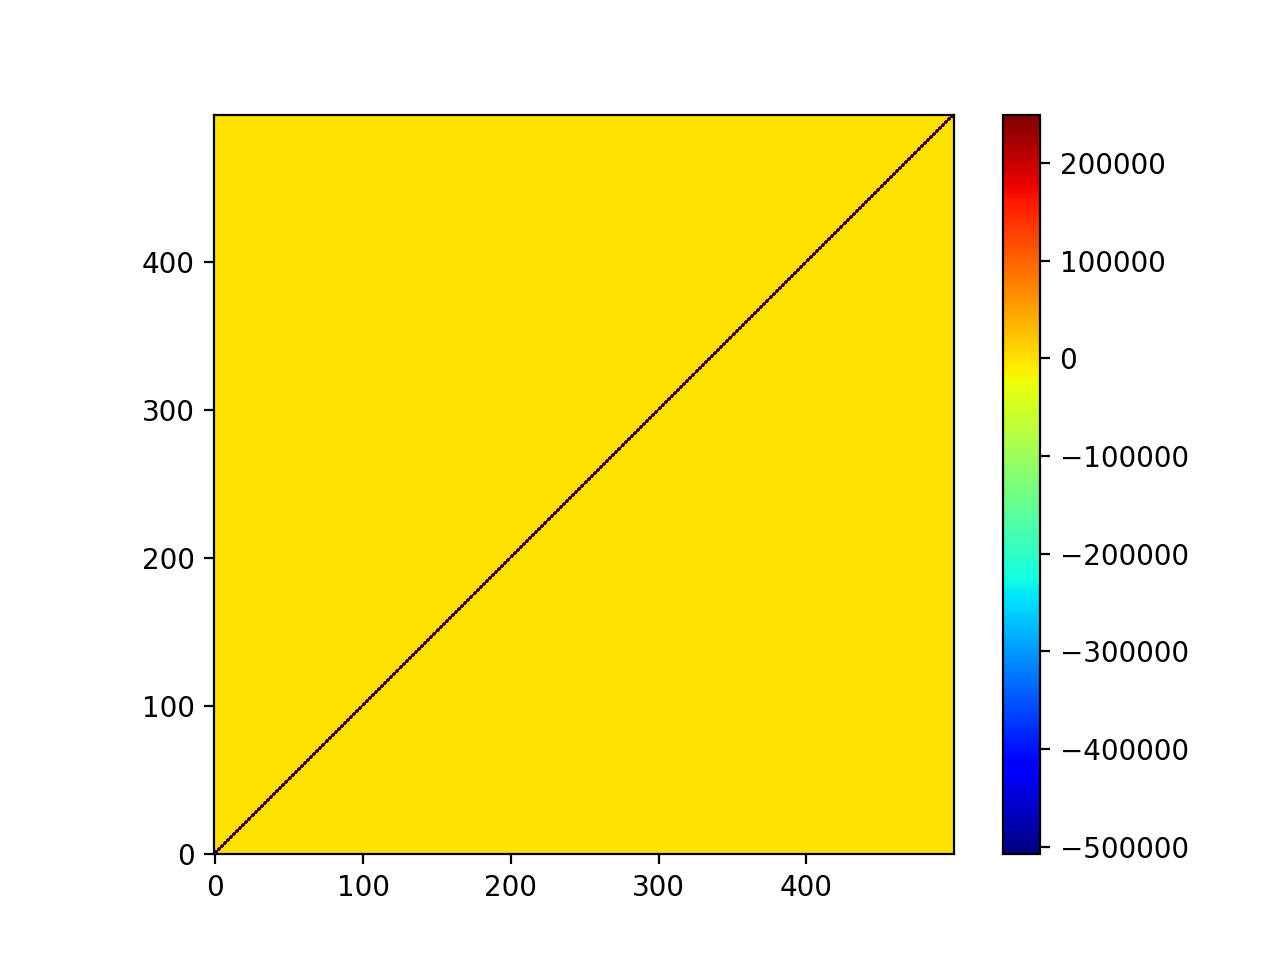

In [182]:
figure()
imshow(O+Ov,origin="lower")
colorbar()

In [183]:
E,z=np.linalg.eigh(-O+Ov)

<IPython.core.display.Javascript object>


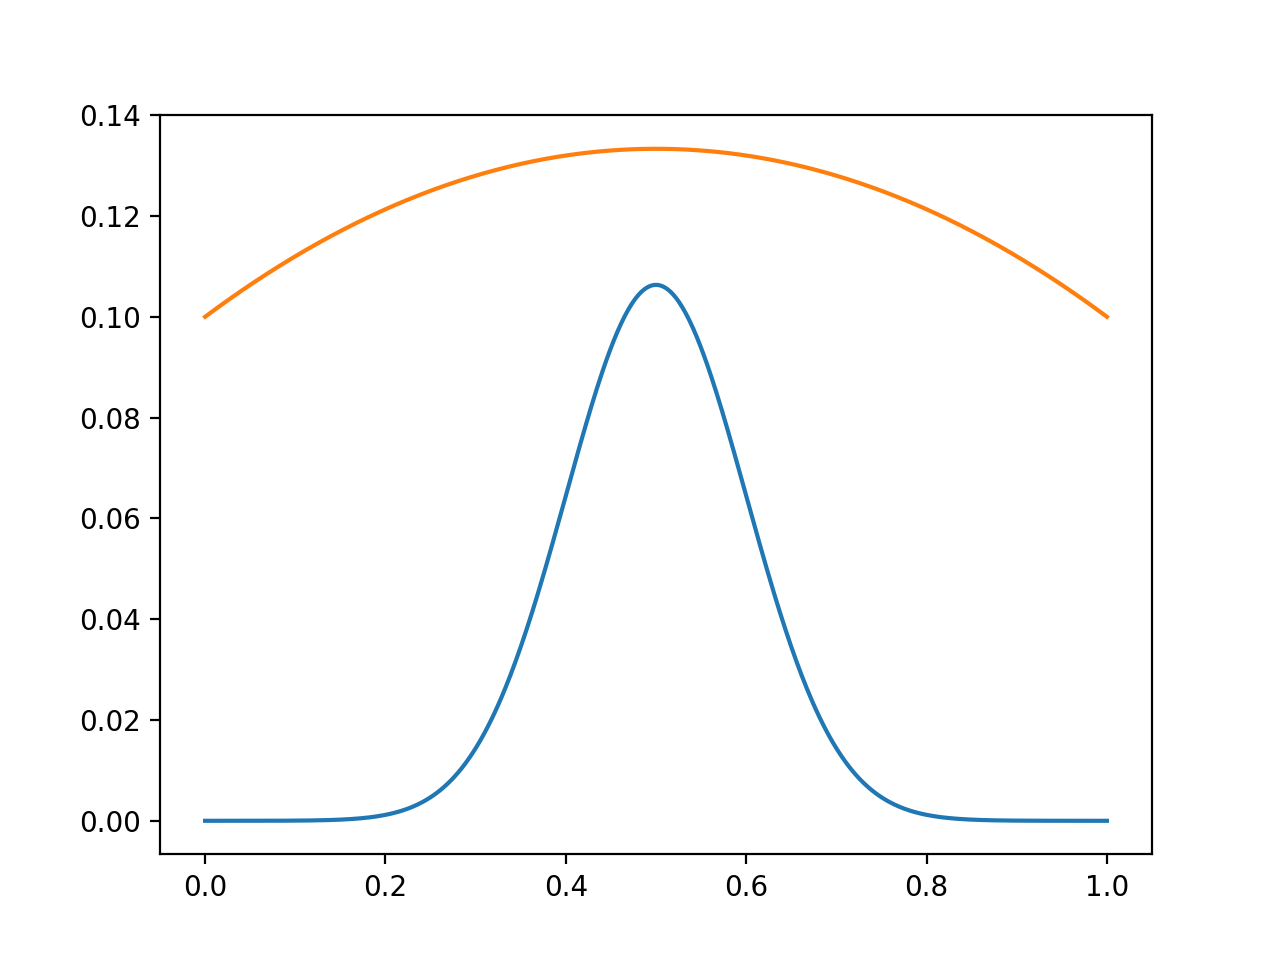

<IPython.core.display.Javascript object>


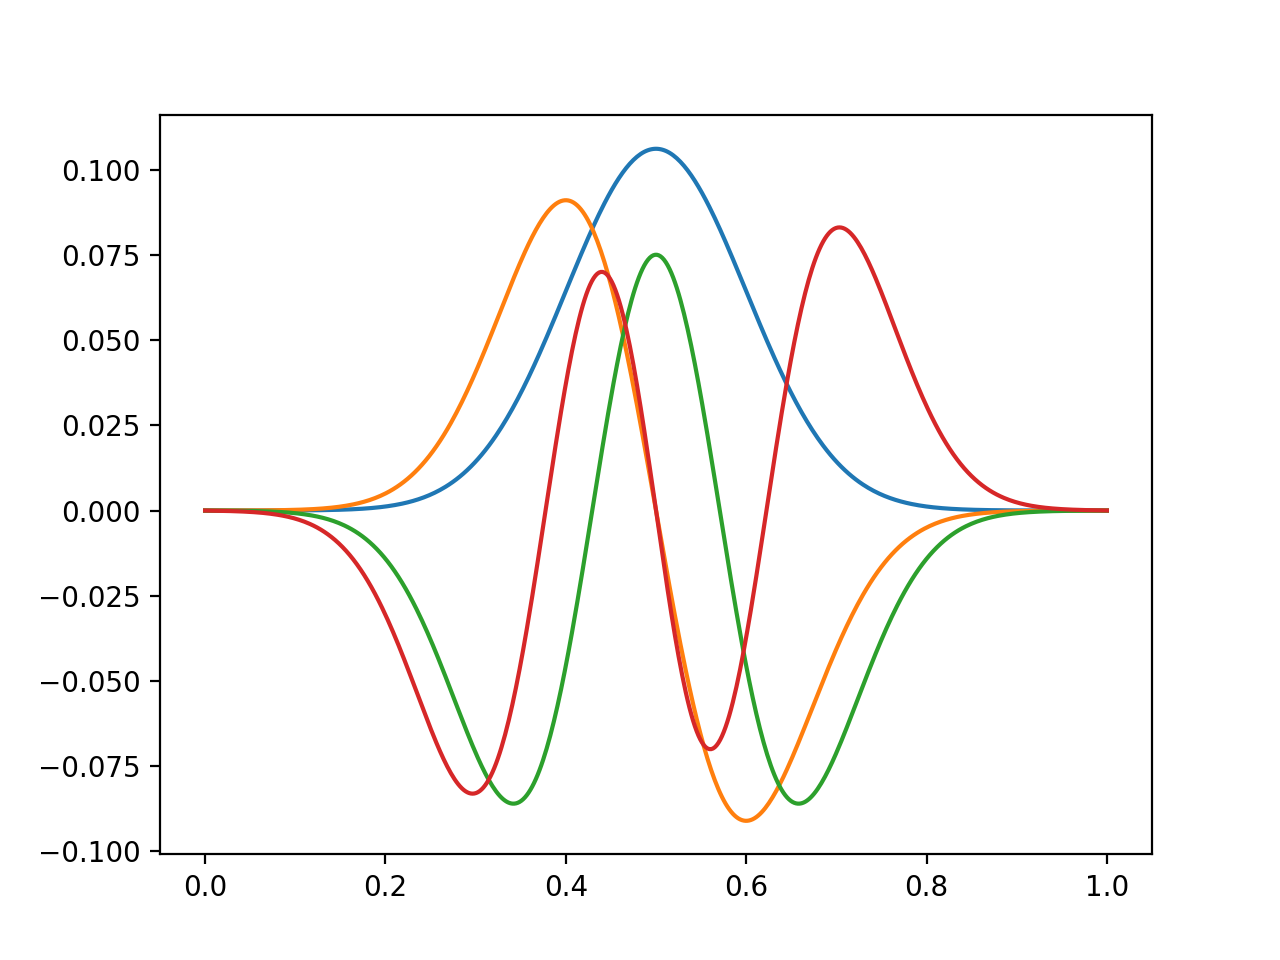

In [184]:
figure()
plot(x,z[:,0])
plot(x,v/10/max(v))

figure()
for i in range(4):
    plot(x,z[:,i])

<IPython.core.display.Javascript object>


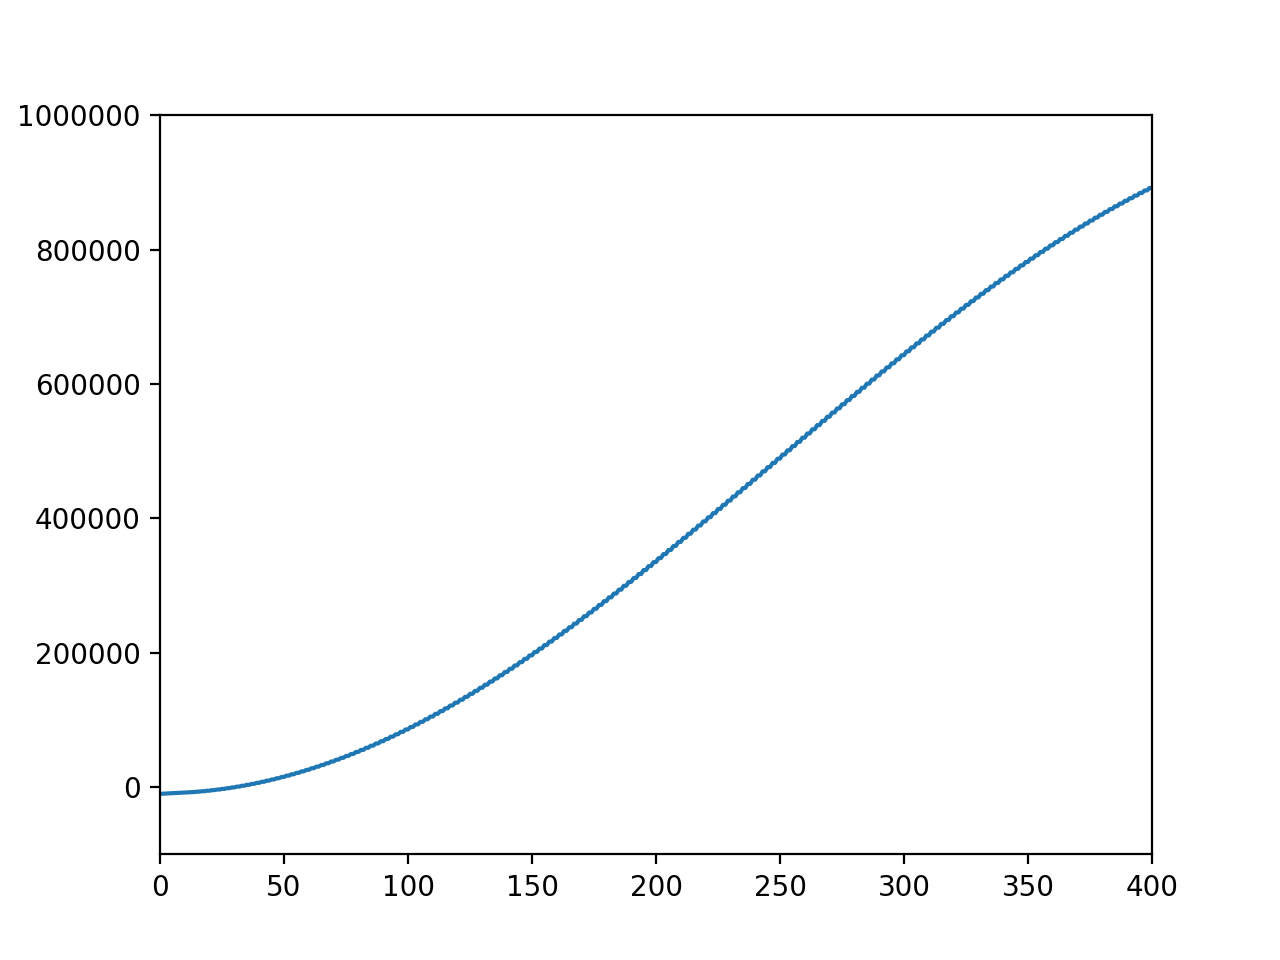

(-100000.0, 1000000.0)

In [185]:
figure()
plot(E)
xlim(0,400)
ylim(-1e5,1e6)